In [1]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib notebook

In [2]:
cd ../

D:\Work-Projects\MyProgs\PyWorkScripts\PyDiagORB5


In [3]:
run start_template.py

wx1 = 62.832
wx2 = 20.944
wx1 - wx2 = 41.888
wx1 + wx2 = 83.776


<IPython.core.display.Javascript object>


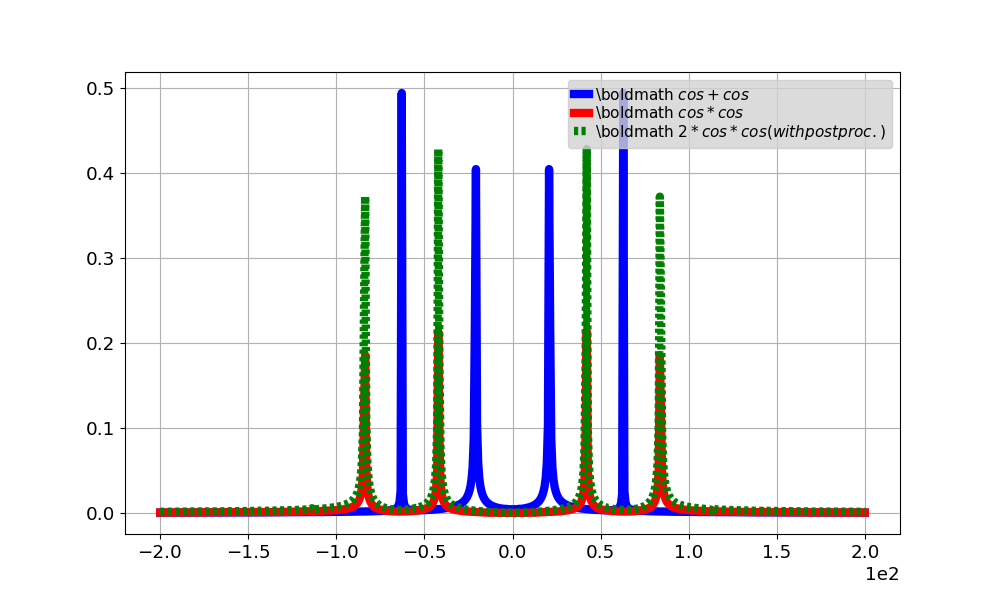

In [4]:
# ***********************************
# *** 1D FFT ***
# ***********************************
import numpy as np
reload()

# signals
dd = dict(nb025_f001)
nsignals = 3

x = np.linspace(0, 10, 2001)
wx1 = 2*np.pi/0.1
wx2 = 2*np.pi/0.3
data1 = np.cos(wx1 * x) + np.cos(wx2 * x)
data2 = np.cos(wx1 * x) * np.cos(wx2 * x)
data3 = np.cos(wx1 * x)
datas = [data1, data2, data3]

print('wx1 = {:0.3f}'.format(wx1))
print('wx2 = {:0.3f}'.format(wx2))
print('wx1 - wx2 = {:0.3f}'.format(wx1 - wx2))
print('wx1 + wx2 = {:0.3f}'.format(wx1 + wx2))

ch_signals = GLO.create_signals_dds(
    GLO.def_arbitrary_1d, [dd] * nsignals,
    flag_arbitrary=True,
    xs=[x] * nsignals,
    datas=datas,
)

# styling
ff = dict(GLO.DEF_PLOT_FORMAT)
ff.update({
    'legends': ['cos + cos', 'cos * cos', '2*cos*cos (with postproc.)'],
    'styles': ['-', '-', ':'],
})

# post-processing
oo_fft_one = dict(GLO.DEF_OPERATION_FFT_1D)
oo_fft_one['oo_fft'].update({
    'flag_f2': True,  # plot two-sided spectrum or one sided
})

post_var1 = [oo_fft_one]
post_var2 = [oo_fft_one]
post_var3 = [
    {'operation': 'mult', 'coef': 2*np.cos(wx2 * x)},
    oo_fft_one
]
oo_postprocessing = [post_var1, post_var2, post_var3]

# plotting
oo = {
    'signals': ch_signals,
    'ff': ff,
    'oo_postprocessing': oo_postprocessing,
    'x_start': -2e2,
    'x_end': 2e2,
}
common.plot_vars_1d(oo)

<IPython.core.display.Javascript object>


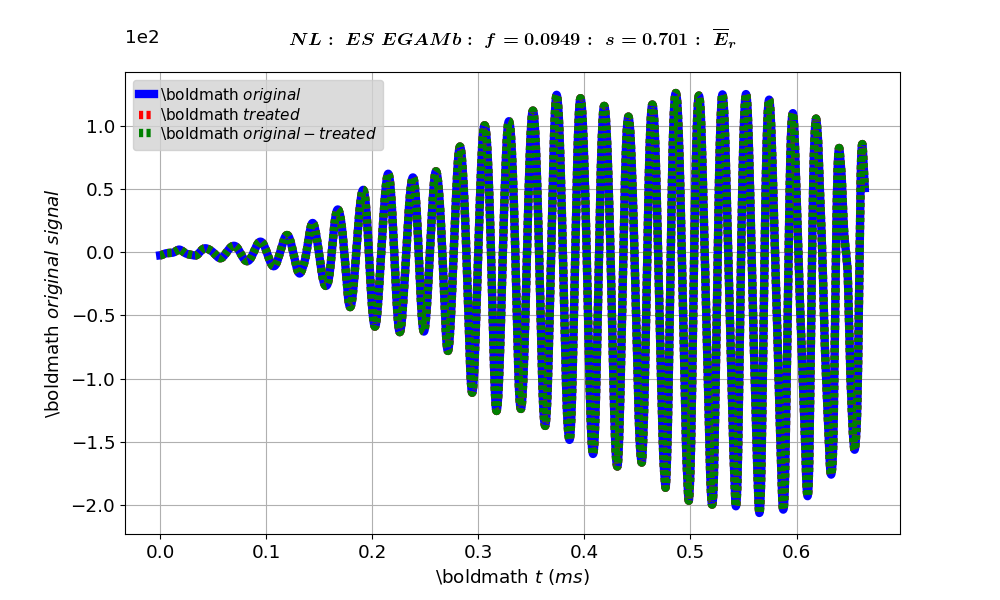

<IPython.core.display.Javascript object>


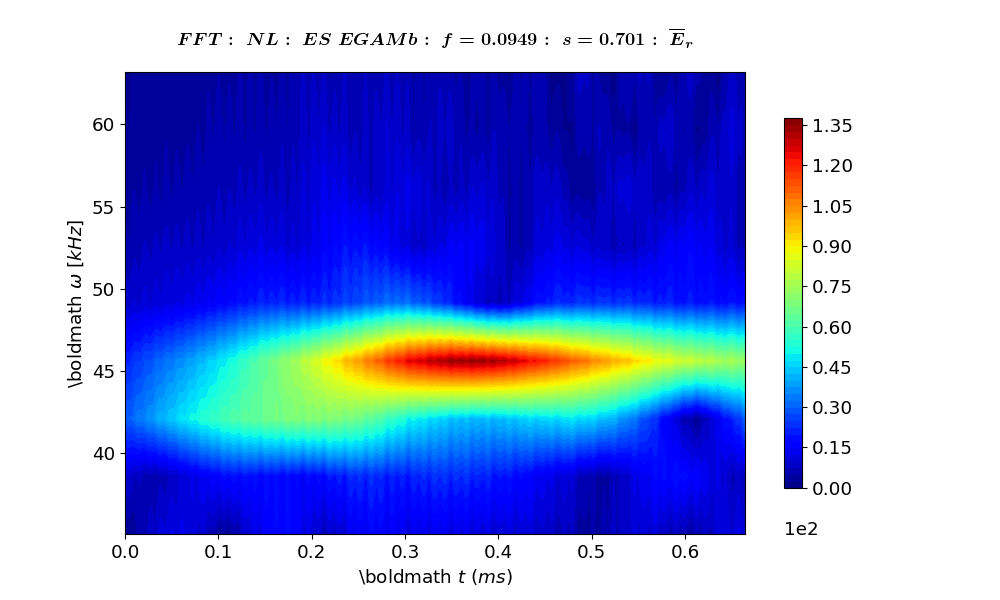

In [5]:
# *************************************************************************
# *** FFT in time ***
# *************************************************************************
reload()

# signal
dd_one = nb025_f009_orig
s_point = 0.70
ch_signals = GLO.create_signals_dds(
    GLO.def_erbar_ts, 
    [dd_one], 
    domains = [s_point],
)

# styling:
ff = dict(GLO.DEF_PLOT_FORMAT)
ff['ylabel-w'] = '\omega'


# post-processing
pps_var1 = [{'operation': 'mult', 'coef': 0.2e5}]
pps_var2 = [{'operation': 'integration-accumulation', 'width': 5268.358, 'domain': [0.0e5, 2.0e5]}]
postprocessing = [pps_var1, pps_var2]

# plotting
oo = {
    'signals': ch_signals,
    'ff': ff,
#     'oo_postprocessing': postprocessing,
    'sel_norm_x': 't-ms',
    'sel_norm_w': 'khz',
    'width_x': 3.0e4,
    'x_fft_domain': [0.0, 1.0e5],
    'w_norm_domain': [35, 65],
}

common.fft_in_time(oo)